In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [16]:
data = pd.read_csv('weather_classification_data.csv')
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [17]:
column_names = ['TEMP', 'HUMID', 'WSPD', 'PREC', 'CLDCV', 'ATM', 'UVIDX', 'SS', 'VISI', 'LOCA', 'WEA']
data.columns = column_names
data.head()

,TEMP,HUMID,WSPD,PREC,CLDCV,ATM,UVIDX,SS,VISI,LOCA,WEA
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEMP    13200 non-null  float64
 1   HUMID   13200 non-null  int64  
 2   WSPD    13200 non-null  float64
 3   PREC    13200 non-null  float64
 4   CLDCV   13200 non-null  object 
 5   ATM     13200 non-null  float64
 6   UVIDX   13200 non-null  int64  
 7   SS      13200 non-null  object 
 8   VISI    13200 non-null  float64
 9   LOCA    13200 non-null  object 
 10  WEA     13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [19]:
data.describe()

,TEMP,HUMID,WSPD,PREC,ATM,UVIDX,VISI
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [20]:
data.groupby('WEA').count()

,TEMP,HUMID,WSPD,PREC,CLDCV,ATM,UVIDX,SS,VISI,LOCA
WEA,,,,,,,,,,
Cloudy,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300
Rainy,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300
Snowy,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300
Sunny,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300


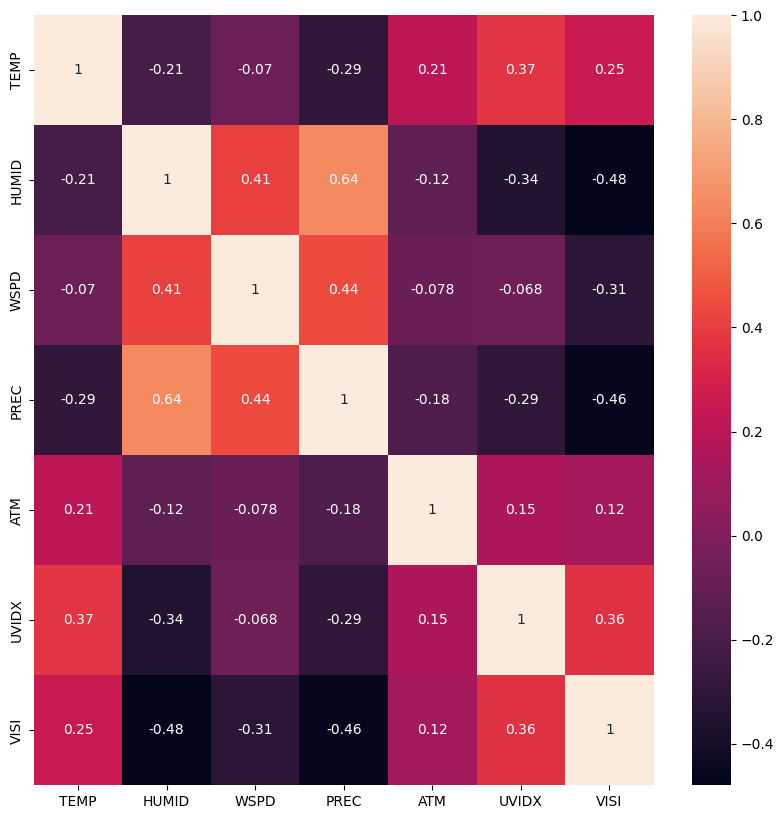

In [21]:
plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show()

In [22]:
from pandas.api.types import is_numeric_dtype

for column in data:
    if not is_numeric_dtype(data[column]):
        for idx, item in enumerate(data[column].unique()):
            data[column] = data[column].apply(lambda x: idx if x == item else x)

In [23]:
data.head()

,TEMP,HUMID,WSPD,PREC,CLDCV,ATM,UVIDX,SS,VISI,LOCA,WEA
0,14.0,73,9.5,82.0,0,1010.82,2,0,3.5,0,0
1,39.0,96,8.5,71.0,0,1011.43,7,1,10.0,0,1
2,30.0,64,7.0,16.0,1,1018.72,5,1,5.5,1,2
3,38.0,83,1.5,82.0,1,1026.25,7,1,1.0,2,2
4,27.0,74,17.0,66.0,2,990.67,1,0,2.5,1,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['WEA'], axis=1), data['WEA'], test_size=0.2, random_state=0)

In [25]:
scaler = StandardScaler()
transform = scaler.fit(X_train)
X_train = transform.transform(X_train)
X_test = transform.transform(X_test)

In [26]:
decision_tree = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall =  recall_score(y_test, y_pred,  average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print('accuracy decisionTree: %.3f' %accuracy)
print('precision decisionTree: %.3f' %precision)
print('recall decisionTree: %.3f' %recall)
print('f1-score decisionTree : %.3f' %f1)

accuracy decisionTree: 0.922
precision decisionTree: 0.922
recall decisionTree: 0.922
f1-score decisionTree : 0.922
